# Simulating the Monty Hall problem (germ. 'Das Ziegenproblem')

<img src="https://mathematicalmysteries.files.wordpress.com/2021/12/04615-0sxvwbnzvvnhuklug.png" alt="" width="25%" align="left">

## Libraries and settings

In [1]:
# Libraries
import os
import random
import matplotlib.pyplot as plt

# Background color of graphics
# plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
#print(os.getcwd())

## Python implementation of the simulation

### Functions for trials

In [2]:
# Function for running single trial
def run_trial(switch_doors, ndoors=3):
    """
    Run a single trial of the Monty Hall problem, with or without switching
    after the gameshow host reveals a goat behind one of the unchosen doors.
    The value of switch_doors is True or False. The car is behind door number 1 
    and the gameshow host knows that.
    """

    # Pick a random door out of the ndoors available
    chosen_door = random.randint(1, ndoors)

    if switch_doors == True:

        # Reveal a goat
        revealed_door = 3 if chosen_door == 2 else 2

        # Make the switch by choosing any other door than the initially-
        # selected one and the one just opened to reveal a goat.
        available_doors = [dnum for dnum in range(1, ndoors + 1)
                           if dnum not in (chosen_door, revealed_door)]

        chosen_door = random.choice(available_doors)

    # You win if you picked door number 1
    return chosen_door == 1

# Function for running multiple trials


def run_trials(ntrials, switch_doors, ndoors=3):
    """
    Run ntrials iterations of the Monty Hall problem with ndoors doors, with
    and without switching (switch_doors = True or False). Returns the number
    of trials which resulted in winning the car by picking door number 1.
    """
    nwins = 0
    for i in range(ntrials):
        if run_trial(switch_doors, ndoors):
            nwins += 1
    return nwins

### Simulation (single trial)

In [3]:
# Total number of doors (fix)
ndoors = 3

# The door with the main price (car)
car_door = 1
print(f'The car is behind door: {car_door}')

# You original choice of door
chosen_door = random.randint(1, 3)
print(f'Your original choice was door: {chosen_door}')

# Your choice to switch the door (can be True or False)
switch_doors = True

################################################################################
# Simulation
if switch_doors:
    
    # Reveal a goat
    revealed_door = 3 if chosen_door == 2 else 2
    print(f'The gameshow host reveals a goat behind door: {revealed_door}')
    
    # Make the switch by choosing any other door than the initially-
    # selected one and the one just opened to reveal a goat. 
    available_doors = [dnum for dnum in range(1, ndoors + 1)
                            if dnum not in (chosen_door, revealed_door)]
        
    finally_chosen_door = random.choice(available_doors)
    print(f'You switched to door: {finally_chosen_door}')
    
else:
     
    finally_chosen_door = chosen_door
    print(f'You don\'t switched and remain with door: {finally_chosen_door}')
    
################################################################################
# Result
if car_door == finally_chosen_door:
    print('\nCongratulations, you are the winner!!!')
else:
    print('\nSorry, there is only a goat waiting for you!')


The car is behind door: 1
Your original choice was door: 2
The gameshow host reveals a goat behind door: 3
You switched to door: 1

Congratulations, you are the winner!!!


### Simulation (multiple trials)

Monty Hall Problem with 3 doors
Proportion of wins without switching: 33.4%
Proportion of wins with switching: 66.7%


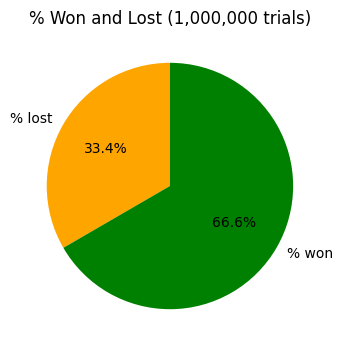

In [4]:
# Parameter settings
ndoors, ntrials = 3, 1000000

# Simulation
nwins_without_switch = run_trials(ntrials, False, ndoors)
nwins_with_switch = run_trials(ntrials, True, ndoors)

# Print results
print(f'Monty Hall Problem with {ndoors} doors')
print(f'Proportion of wins without switching: {nwins_without_switch/ntrials*100:.1f}%')
print(f'Proportion of wins with switching: {nwins_with_switch/ntrials*100:.1f}%')

# Graphic
labels = ['% lost', '% won']
sizes = [round(nwins_without_switch/ntrials*100, 1), round(nwins_with_switch/ntrials*100, 1)]
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sizes, 
       labels=labels,
       autopct='%1.1f%%', 
       startangle=90,
       colors=['orange', 'green'])
ax.set_title(f'% Won and Lost ({ntrials:,} trials)', fontsize=12)
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-03-13 20:30:56
Python Version: 3.10.13
-----------------------------------
